# **Credit Score Prediction Models USING MACHINE LEARNING AND NEURAL NETWORKS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
parisrohan_credit_score_classification_path = kagglehub.dataset_download('parisrohan/credit-score-classification')
data = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')

df = data.copy()
pd.set_option('display.max_columns', None)

In [ ]:
print("Total Rows:", df.shape[0])
print("Total Features:", df.shape[1])

print(df.columns)

Total Rows: 100000
Total Features: 28
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [ ]:
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


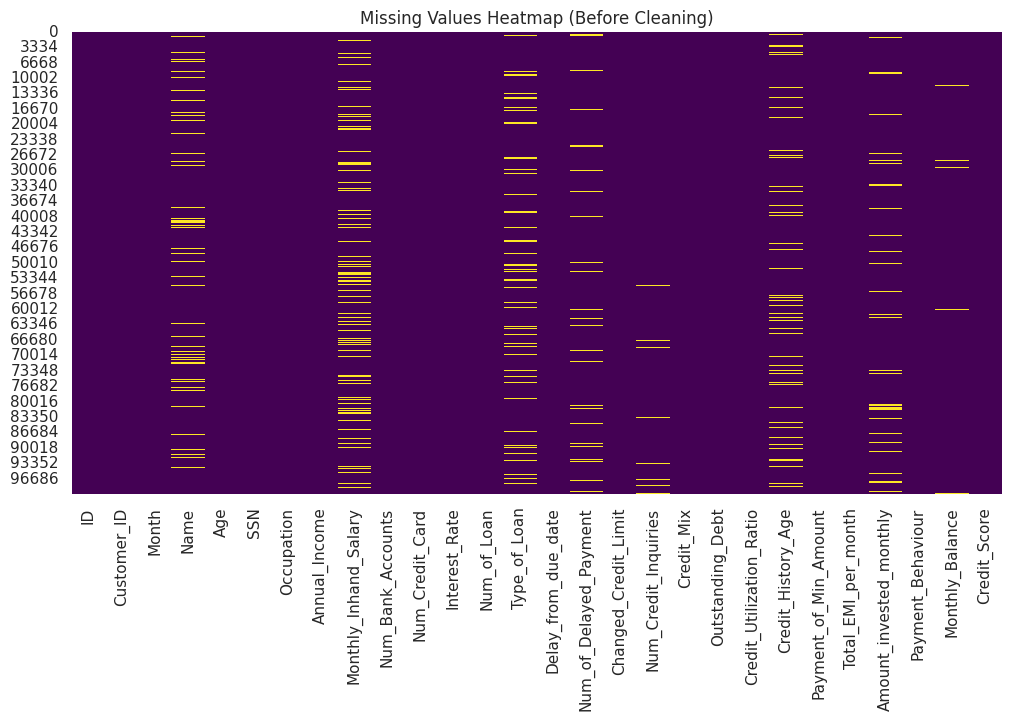

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

Interpretation:
The heatmap provides a visual overview of missing values in the dataset before any cleaning. Columns with lighter shades indicate the presence of missing data, while darker areas represent complete entries. From the pattern observed, it is clear which features have significant gaps and may require imputation or removal. This visualization helps identify the extent and distribution of missing values, guiding the data cleaning process effectively.

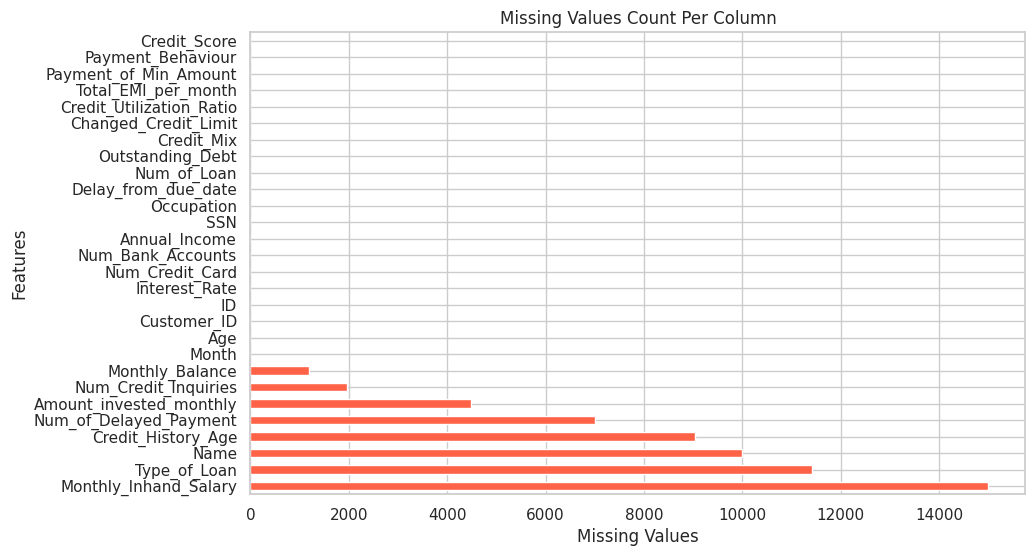

In [ ]:
df.isnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), color='tomato')
plt.title('Missing Values Count Per Column')
plt.xlabel('Missing Values')
plt.ylabel('Features')
plt.show()

Interpretation:
The bar chart shows the count of missing values for each feature in the dataset. Features with longer bars have more missing values, indicating a higher level of incompleteness. This visualization makes it easy to identify which columns are most affected by missing data. Such insights are crucial for prioritizing data cleaning steps, such as deciding whether to impute or drop certain features based on the severity of missing values.

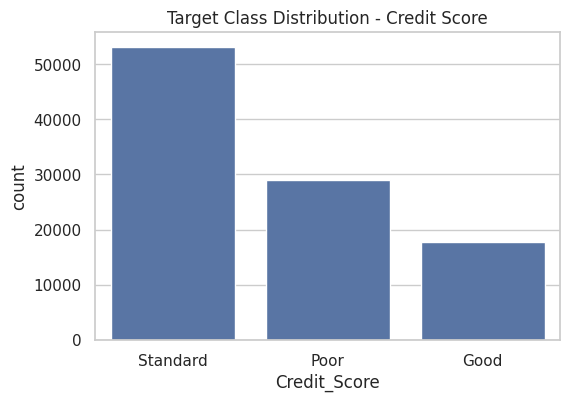

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit_Score', order=df['Credit_Score'].value_counts().index)
plt.title('Target Class Distribution - Credit Score')
plt.show()

Interpretation:
The count plot displays the frequency of each class within the Credit_Score variable. It reveals how balanced or imbalanced the target classes are. If one category (e.g., "Good") has significantly more records than others (e.g., "Poor" or "Standard"), it indicates class imbalance. This insight is important because imbalanced target distributions can bias machine learning models and may require techniques like resampling or class weighting to address.

# **Data Cleaning and Transformation specifically for categorical columns**

In [ ]:
df.columns = df.columns.str.strip().str.lower()  # Clean column names

In [ ]:
def process_categorical_columns(df):
    if 'occupation' in df.columns and 'customer_id' in df.columns:
        df['occupation'] = df['occupation'].replace("_______", pd.NA)
        df['occupation'] = df.groupby('customer_id')['occupation'].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    if 'type_of_loan' in df.columns:
        loan_type_split = df['type_of_loan'].dropna().str.split(r', and |, | and |,')
        loan_types_list = [item.strip() for sublist in loan_type_split.tolist() for item in sublist]
        unique_loan_types = set(loan_types_list)
        for loan_type in unique_loan_types:
            col_name = f'has_{loan_type.replace(" ", "_").lower()}'
            df[col_name] = df['type_of_loan'].apply(lambda x: int(loan_type in x) if pd.notna(x) else pd.NA)
            df[col_name].fillna(df[col_name].mode().iloc[0], inplace=True)
        df.drop('type_of_loan', axis=1, inplace=True)

    if 'credit_mix' in df.columns:
        df['credit_mix'] = df['credit_mix'].replace("_", pd.NA)
        df['credit_mix'] = df.groupby('customer_id')['credit_mix'].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    if 'payment_of_min_amount' in df.columns:
        df['payment_of_min_amount'] = df['payment_of_min_amount'].replace("NM", pd.NA)
        df['payment_of_min_amount'] = df.groupby('customer_id')['payment_of_min_amount'].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    if 'payment_behaviour' in df.columns:
        df['payment_behaviour'] = df['payment_behaviour'].replace("!@9#%8", pd.NA)
        df['payment_behaviour'] = df.groupby('customer_id')['payment_behaviour'].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    return df

df = process_categorical_columns(df)


In [ ]:
def label_encode_categoricals(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

df = label_encode_categoricals(df)

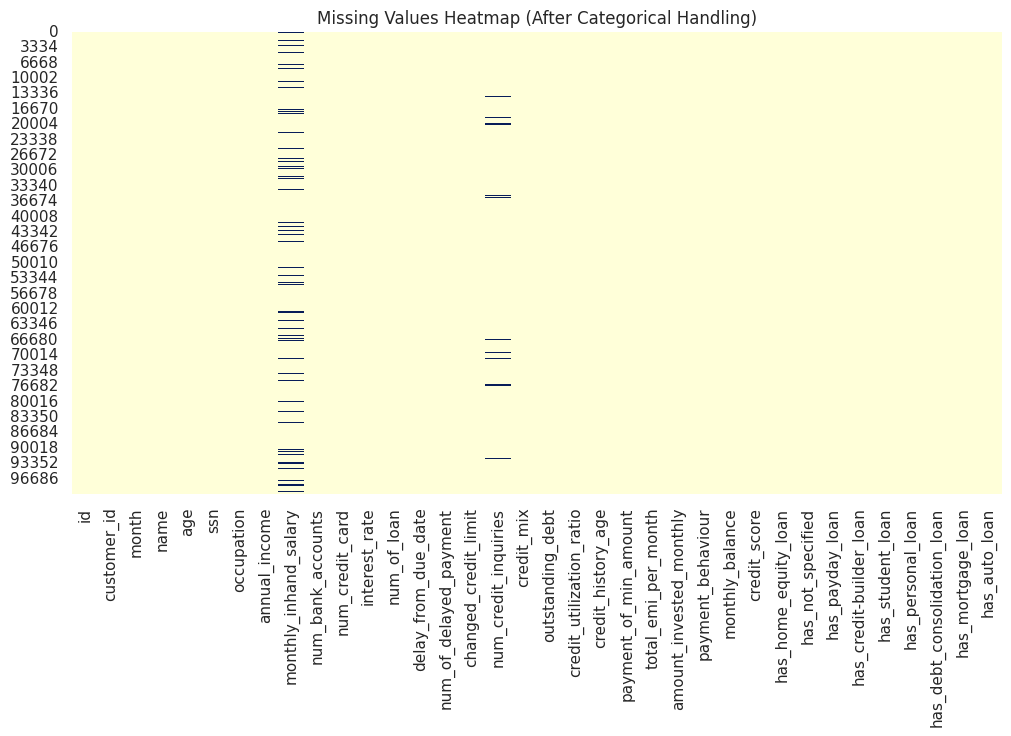

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values Heatmap (After Categorical Handling)")
plt.show()

Interpretation:
The heatmap shows the updated pattern of missing values after processing categorical features. Compared to the initial heatmap, fewer light-colored areas indicate that some missing values have been successfully handled or imputed. Remaining bright spots highlight which columns still contain missing data and may need further treatment. This visualization helps assess the effectiveness of initial data cleaning steps and guides the next phase of preprocessing.

In [ ]:
integer_columns = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate',
                   'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
                   'num_credit_inquiries', 'credit_history_age']

float_columns = ['credit_utilization_ratio', 'annual_income', 'monthly_inhand_salary',
                 'changed_credit_limit', 'outstanding_debt', 'total_emi_per_month',
                 'amount_invested_monthly', 'monthly_balance']

# Convert to numeric
for col in integer_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')

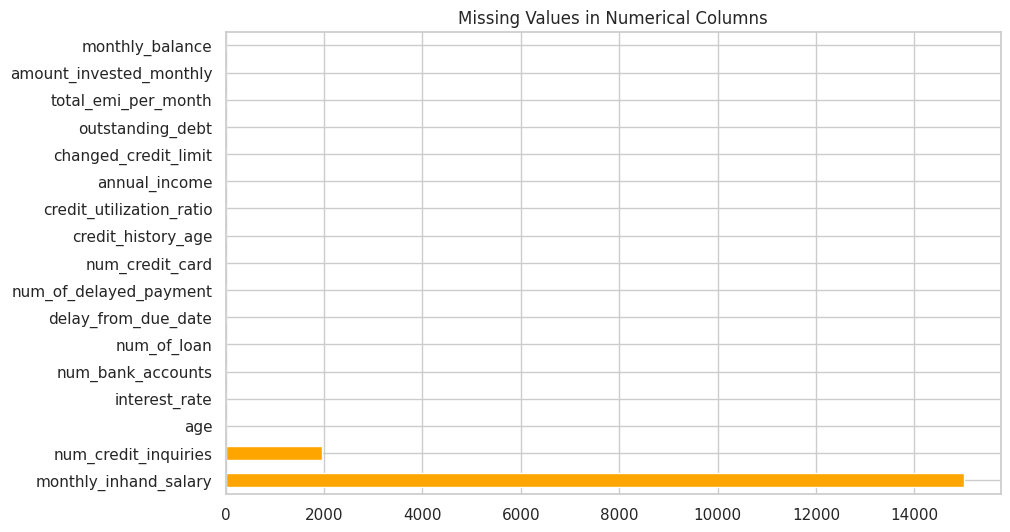

In [ ]:
df[integer_columns + float_columns].isnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Missing Values in Numerical Columns')
plt.show()

Interpretation:
The bar chart highlights the extent of missing data in numerical features of the dataset. Columns with longer bars have more missing values, signaling a greater need for imputation or handling. This focused view helps prioritize cleaning efforts for numerical variables, which are often critical for modeling and statistical analysis. Identifying and addressing these gaps ensures more reliable and accurate outcomes in further data processing steps.

In [ ]:
columns_to_scale = integer_columns + float_columns
df_scaled_input = df[columns_to_scale].copy()
df_scaled_input = df_scaled_input.fillna(df_scaled_input.median())

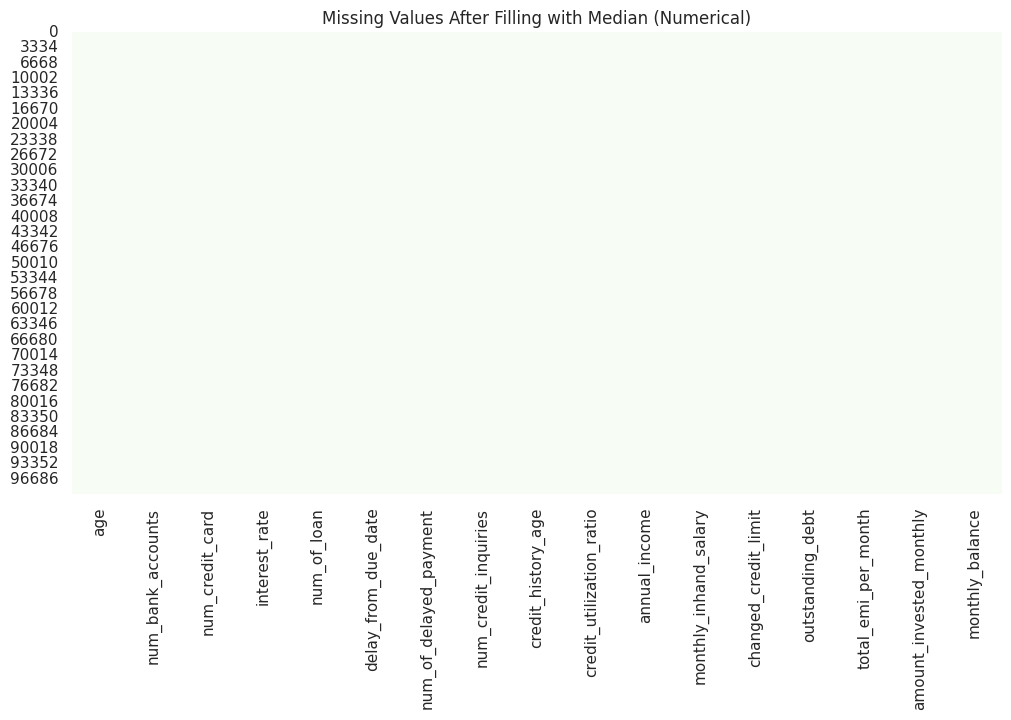

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_scaled_input.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values After Filling with Median (Numerical)")
plt.show()

Interpretation:
The heatmap shows that after filling missing numerical values with the median, the dataset is now mostly dark green—indicating that missing values in these columns have been successfully handled. The absence of bright spots confirms that the imputation process was effective, ensuring the dataset is ready for scaling or modeling without the risk of errors due to null values in numerical features.

In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled_input)
df_scaled = pd.DataFrame(scaled_array, columns=columns_to_scale, index=df.index)

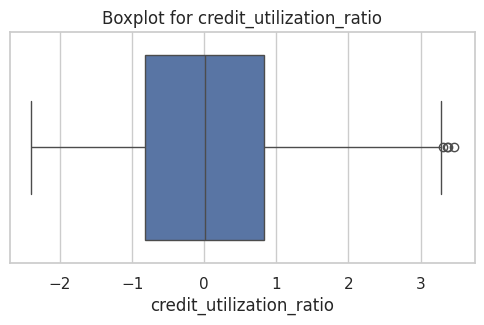

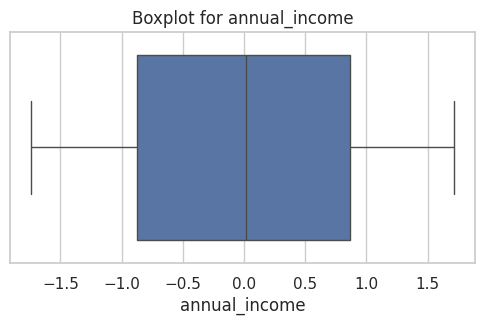

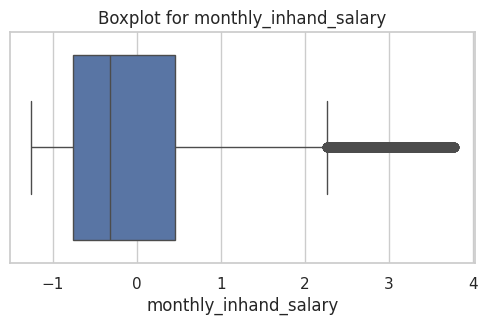

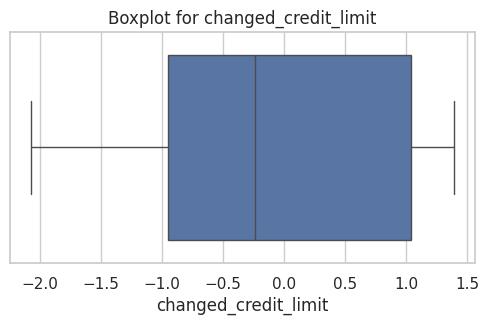

In [ ]:
for col in float_columns[:4]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_scaled[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Interpretation:
The boxplots provide a visual summary of the distribution, central tendency, and spread of the first four float-type features after scaling. They clearly highlight any outliers as points outside the whiskers. This helps in understanding which features have extreme values that may need to be addressed through techniques like capping, transformation, or robust modeling. Such analysis is important for improving model performance and stability.

In [ ]:
df_final = pd.concat([df.drop(columns=columns_to_scale), df_scaled], axis=1)


In [ ]:
print("Final Shape:", df_final.shape)
print("Final Columns:", df_final.columns)

Final Shape: (100000, 28)
Final Columns: Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score', 'age', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries',
       'credit_history_age', 'credit_utilization_ratio', 'annual_income',
       'monthly_inhand_salary', 'changed_credit_limit', 'outstanding_debt',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')


In [ ]:
df_final

,id,customer_id,month,name,ssn,occupation,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,has_home_equity_loan,has_credit-builder_loan,has_student_loan,has_personal_loan,has_not_specified,has_mortgage_loan,has_auto_loan,has_payday_loan,has_debt_consolidation_loan,age,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_history_age,credit_utilization_ratio,annual_income,monthly_inhand_salary,changed_credit_limit,outstanding_debt,total_emi_per_month,amount_invested_monthly,monthly_balance
0,16406,12320,3,84,10205,12,1,0,1,0,1,1,0,1,0,0,1,0,0,-0.917716,-0.120024,-0.143150,-0.148934,0.409569,-1.215932,1.534934,-0.121943,-0.287094,-1.067562,-0.642799,-0.744337,-1.137078,1.438263,-0.162960,1.134368,-0.263808
1,16417,12320,2,84,10205,12,1,0,1,0,1,1,0,1,0,0,1,0,0,-0.917716,-0.120024,-0.143150,-0.148934,0.409569,-1.485110,1.777758,-0.121943,1.564280,-0.066489,-0.642799,-0.315849,-1.137078,1.438263,-0.162960,-1.478137,-0.640761
2,16428,12320,6,84,10205,12,1,0,1,0,1,1,0,1,0,0,1,0,0,-2.093302,-0.120024,-0.143150,-0.148934,0.409569,-1.215932,1.534934,-0.121943,-0.254033,-0.718376,-0.642799,-0.315849,1.390970,1.438263,-0.162960,1.159590,-0.046897
3,16441,12320,0,84,10205,12,1,0,1,0,1,1,0,1,0,0,1,0,0,-0.917716,-0.120024,-0.143150,-0.148934,0.409569,-1.081342,1.098609,-0.121943,-0.245768,-0.177318,-0.642799,-0.315849,1.013897,1.438263,-0.162960,-0.675233,-1.330761
4,16452,12320,7,84,10205,12,1,0,1,0,1,1,0,1,0,0,1,0,0,-0.917716,-0.120024,-0.143150,-0.148934,0.409569,-1.014048,1.777758,-0.121943,-0.237503,-1.463366,-0.642799,-0.744337,-1.137078,1.438263,-0.162960,0.209315,0.063829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6528,1009,9,1,0,0,1,0,0,1,0,0,0,1,0,0,-0.703973,-0.111506,-0.127653,-0.140358,-0.151659,0.129961,1.534934,-0.127170,0.762569,0.464817,0.355551,-0.226137,-1.118896,0.934341,-0.164702,0.718749,0.914909
99996,62789,8833,7,6528,1009,9,1,0,0,1,0,0,1,0,0,0,1,0,0,-0.703973,-0.111506,-0.127653,-0.140358,-0.151659,-0.206512,1.534934,-0.127170,0.770834,1.618273,0.355551,-0.226137,-1.118896,0.934341,-0.164702,0.560199,0.973859
99997,62790,8833,5,6528,1009,9,1,0,0,1,0,0,1,0,0,0,1,0,0,-0.703973,-0.111506,-0.127653,12.127547,-0.151659,0.399139,1.481816,-0.127170,0.779099,1.753100,0.355551,-0.226137,-1.118896,0.934341,-0.164702,-0.435215,1.032774
99998,62791,8833,4,6528,1009,9,1,0,0,2,0,0,1,0,0,0,1,0,0,-0.703973,-0.111506,-0.127653,-0.140358,-0.151659,-0.071923,1.777758,-0.127170,0.787364,0.264427,0.355551,-0.226137,-1.118896,0.934341,-0.164702,-0.367366,-0.185417


In [ ]:
print(" Summary Statistics (Raw Data, Cleaned Symbols):")
display(df.describe(include='all'))

print("\n Most Frequent Occupations (Raw):")
print(df['occupation'].value_counts(dropna=False).head(10))  # Show NaNs too

print("\n Top 5 Customers with Highest Outstanding Debt:")
top_debtors = df[['customer_id', 'outstanding_debt']].dropna().sort_values(by='outstanding_debt', ascending=False).head(5)
display(top_debtors)


✅ Summary Statistics (Raw Data, Cleaned Symbols):


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,has_home_equity_loan,has_credit-builder_loan,has_student_loan,has_personal_loan,has_not_specified,has_mortgage_loan,has_auto_loan,has_payday_loan,has_debt_consolidation_loan
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.0,100000.000000,100000.000000,100000.000000,84998.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000,98035.0,100000.00000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,6249.500000,3.500000,5578.77269,548.4388,5901.165320,6.949840,9534.851280,4194.170850,17.09128,22.47443,72.46604,192.91587,21.06878,280.44489,2623.412410,27.754251,1.22080,6582.052460,32.285173,214.73581,0.594320,1403.118217,49445.93739,2.48272,49992.209640,1.353460,0.314000,0.31728,0.31040,0.311040,0.316800,0.313600,0.305600,0.319440,0.31040
std,28867.657797,3608.457213,2.291299,3143.59567,261.998235,3786.195708,4.309542,5482.072681,3183.686167,117.404834,129.05741,466.422621,124.72721,14.860104,263.566528,1265.014097,193.177339,0.80462,3810.133368,5.116875,120.991828,0.491026,8306.041270,28268.79724,2.02152,28855.230165,0.764913,0.464119,0.46542,0.46266,0.462921,0.465231,0.463958,0.460663,0.466262,0.46266
min,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,303.645417,-1.0,0.0,1.0,0.0,-5.0,0.0,0.000000,0.0,0.00000,0.000000,20.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,3124.750000,1.750000,2849.00000,339.0,2576.000000,3.000000,4763.000000,1625.568229,3.0,4.0,8.0,100.75,10.0,81.0,1419.000000,3.0,1.00000,3280.750000,28.052567,111.0,0.000000,30.306660,24831.75000,1.00000,24999.750000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,49999.500000,6249.500000,3.500000,5635.00000,531.0,5880.000000,7.000000,9613.000000,3093.745000,6.0,5.0,13.0,211.0,18.0,179.0,2319.000000,6.0,1.00000,6548.500000,32.305784,202.0,1.000000,69.249473,49831.50000,2.00000,49999.500000,2.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,74999.250000,9374.250000,5.250000,8440.00000,747.0,9185.000000,11.000000,14282.000000,5957.448333,7.0,7.0,20.0,274.0,28.0,570.0,3941.000000,9.0,2.00000,9890.250000,36.496663,319.0,1.000000,161.224249,74831.25000,5.00000,74999.250000,2.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,99999.000000,12499.000000,7.000000,10139.00000,1787.0,12500.000000,14.000000,18939.000000,15204.633333,1798.0,1499.0,5797.0,433.0,67.0,749.0,4383.000000,2597.0,2.00000,13177.000000,50.000000,404.0,1.000000,82331.000000,91049.00000,5.00000,98792.000000,2.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000



💼 Most Frequent Occupations (Raw):
occupation
7     7096
4     6864
1     6824
9     6776
0     6744
12    6744
10    6720
2     6720
13    6672
5     6648
Name: count, dtype: int64

💳 Top 5 Customers with Highest Outstanding Debt:


,customer_id,outstanding_debt
10671,9893,13177.0
10670,9893,13177.0
10669,9893,13177.0
10668,9893,13177.0
10667,9893,13177.0


credit_score,0,1,2
occupation,,,
0,0.179876,0.299633,0.520491
1,0.180016,0.272856,0.547128
2,0.181877,0.287410,0.530714
3,0.177756,0.272877,0.549368
4,0.186142,0.304252,0.509606


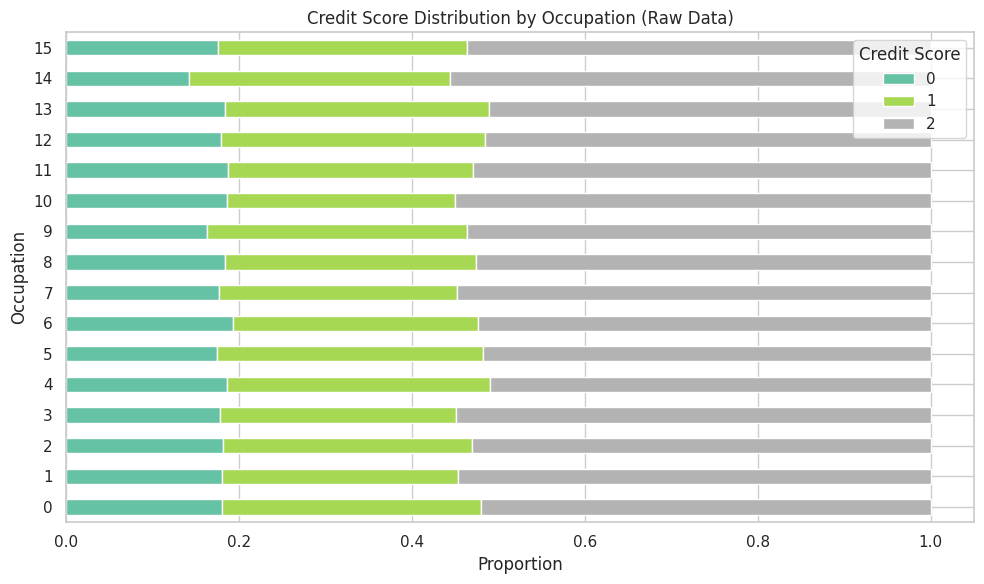

In [ ]:
credit_occupation = df.groupby('occupation')['credit_score'].value_counts(normalize=True).unstack().fillna(0)
display(credit_occupation.head(5))

credit_occupation.T.head(3).T.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Credit Score Distribution by Occupation (Raw Data)")
plt.xlabel("Proportion")
plt.ylabel("Occupation")
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()


Interpretation:
The stacked bar chart illustrates how credit scores are distributed across different occupations. Each bar represents an occupation, and the segments within the bar show the proportion of each credit score category (e.g., Good, Standard, Poor). This visualization helps identify patterns or trends—for example, certain occupations may have a higher proportion of "Good" credit scores, while others may be more associated with "Poor" scores. Such insights can guide credit risk analysis or segmentation strategies based on profession.

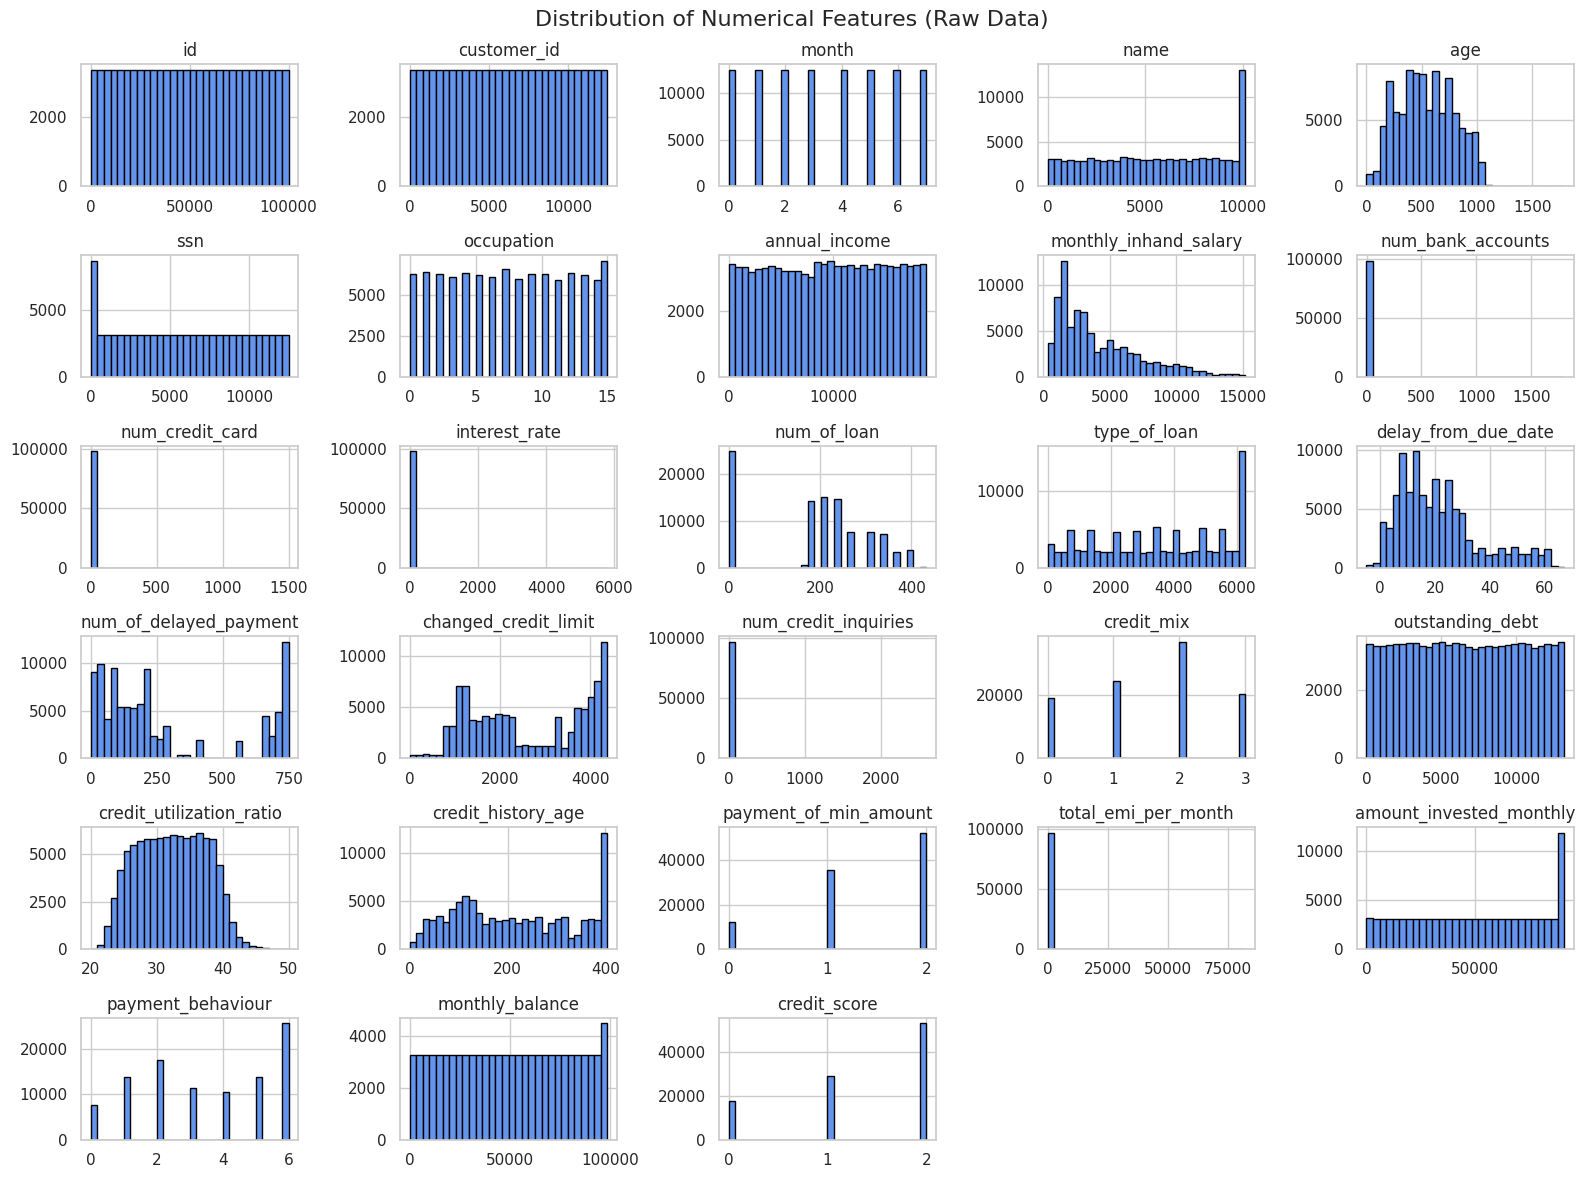

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=30, figsize=(16, 12), color='cornflowerblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (Raw Data)', fontsize=16)
plt.tight_layout()
plt.show()


Interpretation:
The histograms display the raw distribution of each numerical feature in the dataset. These plots help identify characteristics such as skewness, modality, and the presence of outliers. Some features may show normal distribution, while others could be skewed or have heavy tails. Understanding these patterns is crucial for deciding whether transformations (e.g., log, box-cox) are needed to improve model performance and ensure that assumptions of statistical methods are met.

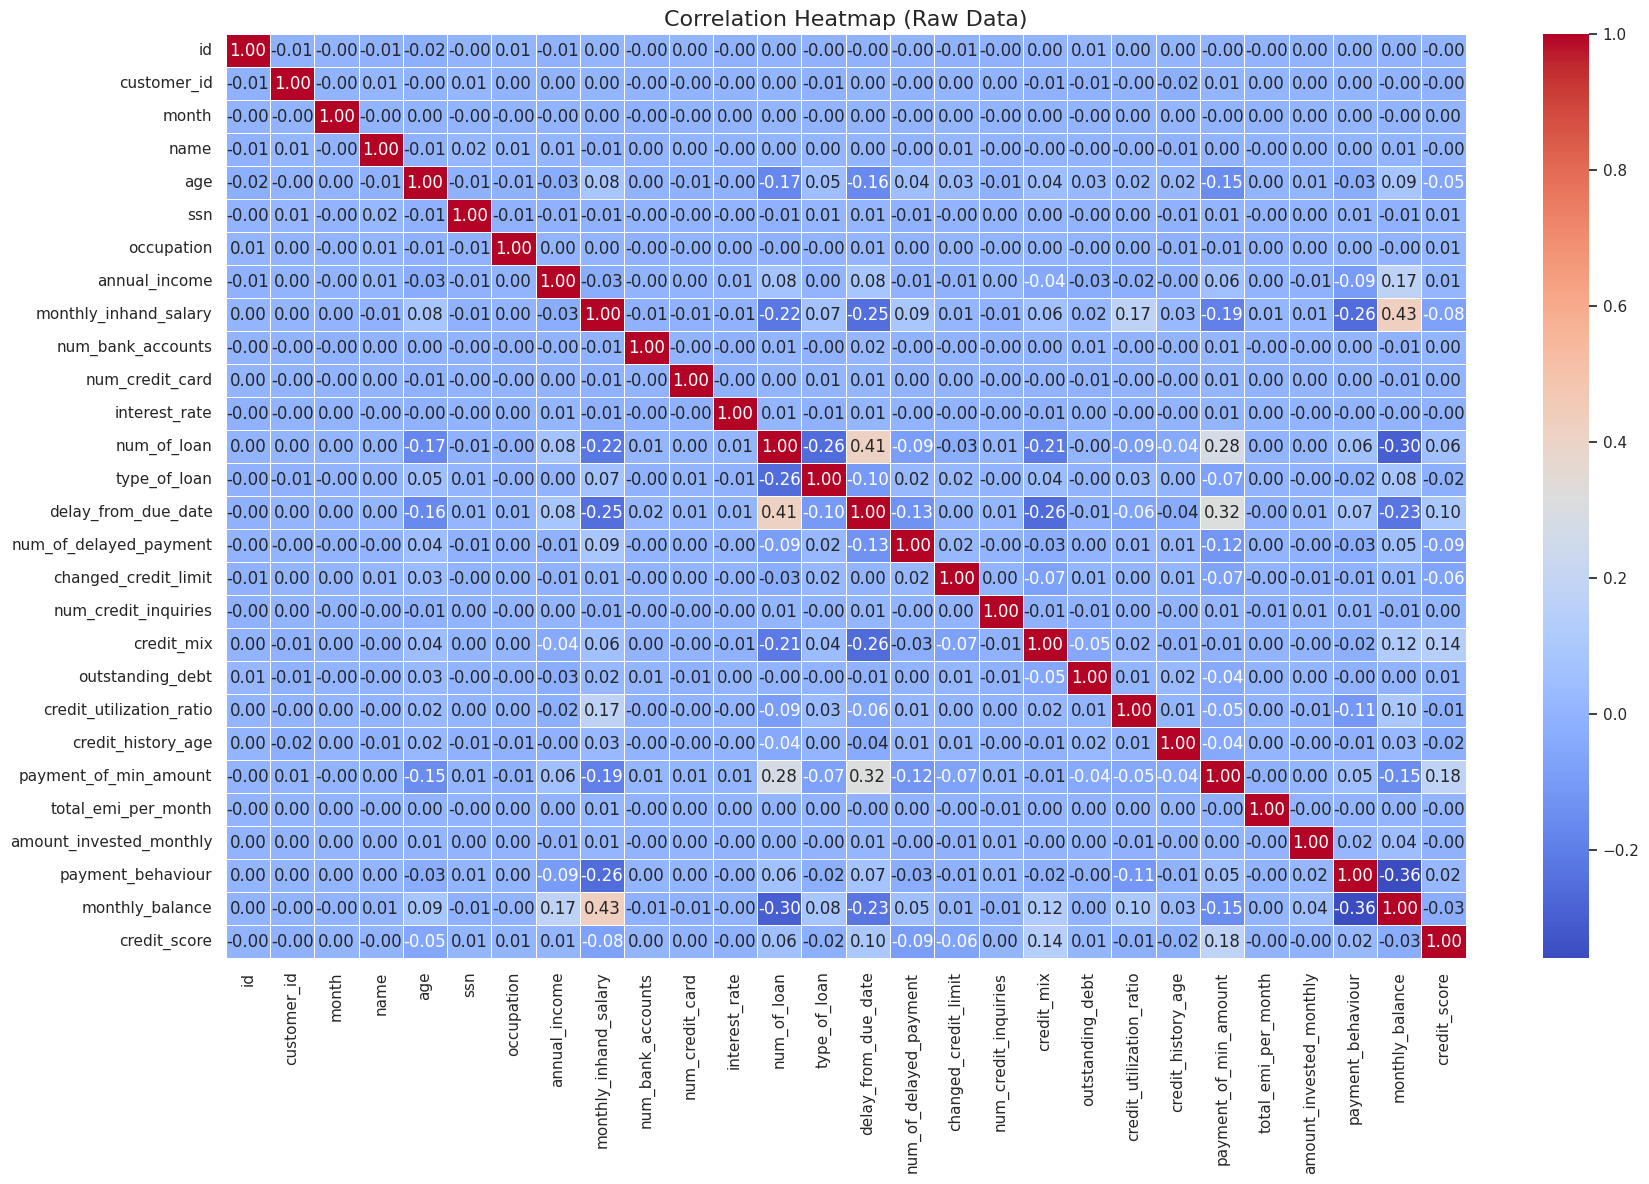

In [ ]:
plt.figure(figsize=(20, 12))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Raw Data)', fontsize=16)
plt.show()


Interpretation:
The correlation heatmap shows the strength and direction of relationships between numerical features. Each cell contains a correlation coefficient, ranging from -1 to 1, indicating the degree to which two features are linearly related. Positive correlations (values closer to 1) suggest that the features move in the same direction, while negative correlations (values closer to -1) indicate opposite movement. A value close to 0 suggests little to no linear relationship. This visualization helps identify which features are highly correlated, which could inform decisions like feature selection, multicollinearity handling, or insights into the underlying data structure.

# **#MODELING**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('credit_score', axis=1)
y = df_final['credit_score']
X=X[:10000]
y=y[:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **#Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       368
           1       0.63      0.50      0.56       616
           2       0.59      0.74      0.66      1016

    accuracy                           0.59      2000
   macro avg       0.58      0.53      0.55      2000
weighted avg       0.59      0.59      0.58      2000

Accuracy: 0.5935


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform Grid Search
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Get best parameters
best_params = grid_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params)




Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Create a new LogisticRegression model with the best parameters
best_lr_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=1000
)

# Fit the best model on the training data
best_lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       368
           1       0.63      0.49      0.55       616
           2       0.63      0.70      0.66      1016

    accuracy                           0.61      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.61      0.61      0.60      2000



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Accuracy: 0.607


Overall Interpretation of RLogistic Regression:
Overall, the model has improved after hyperparameter tuning, with an increase in accuracy from 59.35% to 61%. The tuning has notably improved the recall for class 0, which was previously underperforming, while maintaining strong performance for class 2. The model's performance for class 1 remains relatively unchanged. However, class 0 still requires attention, as its precision is slightly low compared to other classes.

# **#RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       368
           1       0.82      0.81      0.82       616
           2       0.82      0.82      0.82      1016

    accuracy                           0.82      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.82      0.82      0.82      2000

Accuracy: 0.816


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define hyperparameter space
param_rf = {
    'n_estimators': [16, 32, 64, 128],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_rf.fit(X_train, y_train)

# Get and print best parameters
best_rf_params = random_rf.best_params_
print("Best Parameters for Random Forest:", best_rf_params)



Best Parameters for Random Forest: {'n_estimators': 16, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}


In [ ]:
# Train a new model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    bootstrap=best_rf_params['bootstrap'],
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       368
           1       0.82      0.81      0.82       616
           2       0.81      0.82      0.81      1016

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



Overall Interpretation of Random Forest Classifier:
The Random Forest model demonstrates strong performance across all classes, with no significant change after tuning. The model’s accuracy remains stable at 81.6%, and its precision, recall, and F1-scores are balanced across the different classes, indicating reliable and consistent predictions. The hyperparameter tuning did not dramatically alter the performance but helped identify a potentially more optimized configuration for better generalization in future applications.

# **#XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Results
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       368
           1       0.81      0.80      0.81       616
           2       0.81      0.81      0.81      1016

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Accuracy: 0.804


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define hyperparameter space
param_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search
random_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_distributions=param_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_xgb.fit(X_train, y_train)

# Get and print best parameters
best_xgb_params = random_xgb.best_params_
print("Best Parameters for XGBoost:", best_xgb_params)




Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Train a new model with the best parameters
best_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=best_xgb_params['n_estimators'],
    learning_rate=best_xgb_params['learning_rate'],
    max_depth=best_xgb_params['max_depth'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    random_state=42
)

best_xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = best_xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_xgb))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       368
           1       0.81      0.81      0.81       616
           2       0.81      0.82      0.81      1016

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000

Accuracy: 0.8060


Overall Interpretation of XGB Clasifier:
The XGBoost model shows consistent and solid performance across all three classes. With 80.4% accuracy and a balanced precision-recall distribution across classes, it is a reliable model. Despite tuning the hyperparameters to optimize model performance, the accuracy did not change significantly, which could indicate that the model was already well-optimized for this dataset. The best parameters help fine-tune the model but do not drastically affect the overall performance. The model's ability to maintain high precision and recall for all classes suggests it is well-suited for this classification task.

#lightgbm

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)

print("LightGBM Results")
print(classification_report(y_test, y_pred_lgb))
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3931
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 35
[LightGBM] [Info] Start training from score -1.699636
[LightGBM] [Info] Start training from score -1.223750
[LightGBM] [Info] Start training from score -0.647935
LightGBM Results
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       368
           1       0.82      0.80      0.81       616
           2       0.81      0.82      0.81      1016

    accuracy                           0.81      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000

Accuracy: 0.8075


#Neural Network

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert y if needed
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

loss, acc = model.evaluate(X_test, y_test_cat)
print("Neural Network Accuracy:", acc)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3924 - loss: 2002.7198 - val_accuracy: 0.4700 - val_loss: 39.1738
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3978 - loss: 69.5130 - val_accuracy: 0.5275 - val_loss: 82.8179
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4025 - loss: 88.2743 - val_accuracy: 0.2237 - val_loss: 80.7099
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4079 - loss: 93.0931 - val_accuracy: 0.2212 - val_loss: 135.3467
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3903 - loss: 53.1636 - val_accuracy: 0.2138 - val_loss: 76.5701
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4176 - loss: 55.5692 - val_accuracy: 0.4975 - val_loss: 115.9094
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4096 - loss: 66.3636 - val_accuracy: 0.5150 - val_loss: 58.3845
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3938 - loss: 50.4343

In [ ]:
from sklearn.base import BaseEstimator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score

# Define model-building function
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(len(set(y_train)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Custom wrapper for Keras model
class KerasModelWrapper(BaseEstimator):
    def __init__(self, optimizer='adam', activation='relu', batch_size=32, epochs=10):
        self.optimizer = optimizer
        self.activation = activation
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        self.model = create_model(optimizer=self.optimizer, activation=self.activation)
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).argmax(axis=1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)  # Calculate accuracy

# Now you can use the KerasModelWrapper in RandomizedSearchCV
model = KerasModelWrapper()

# Define hyperparameter space
param_nn = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

# Perform Randomized Search
random_nn = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_nn,
    n_iter=5,
    cv=3,
    verbose=1,
    n_jobs=-1
)
random_nn.fit(X_train, y_train)

# Get best parameters
best_nn_params = random_nn.best_params_
print("Best Parameters for Neural Network:", best_nn_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for Neural Network: {'optimizer': 'rmsprop', 'epochs': 20, 'batch_size': 16, 'activation': 'tanh'}


In [ ]:
# Train a new model using best parameters
final_nn_model = create_model(
    optimizer=best_nn_params['optimizer'],
    activation=best_nn_params['activation']
)

final_nn_model.fit(
    X_train,
    y_train,
    epochs=best_nn_params['epochs'],
    batch_size=best_nn_params['batch_size'],
    verbose=0
)

# Predict and evaluate
y_pred_nn = final_nn_model.predict(X_test)
y_pred_nn_labels = y_pred_nn.argmax(axis=1)

print(classification_report(y_test, y_pred_nn_labels))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.64      0.02      0.05       368
           1       0.38      0.01      0.02       616
           2       0.51      0.99      0.67      1016

    accuracy                           0.51      2000
   macro avg       0.51      0.34      0.25      2000
weighted avg       0.50      0.51      0.36      2000



In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_nn_labels)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5105
